# HoG classifier

In this exercise we aim to unify two of the exercises from last week. 
We need to first create HoG feature of images and then use the features to train the classifier to do face detection.
Hence, we will need to create have training set for the classifier.

First, consider HoG features from last week again.

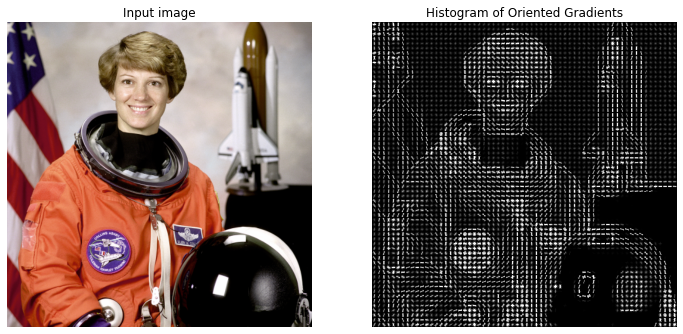

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import hog
from skimage import data, exposure
import skimage


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


## Training Set

Note the creation of a dataset is vital for training a succesfull ML model. In this exercise we extract the image sample for you, but try to follow the steps. As it might be very useful for you going forward.

- Positive training samples

Labeled Faces in the Wild dataset provided by Scikit-Learn consists of variety of faces which is perfect for our positive set.

In [3]:
#positive set of labbeled people in the wild 

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape ## 13233 face images to use for training

(13233, 62, 47)

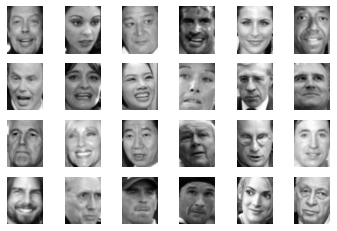

In [4]:
# Visualize Positive Set (face images)

fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(positive_patches[500 * i], cmap='gray')
    axi.axis('off')



- Negative training samples

For Negative set we need images without face on them. Scikit-Image offers images which can be used in this case. To incerease the size of negative set we extract patches of image at different scale using PatchExtractor from Scikit-Learn.

In [5]:
# negative data samples

from skimage import data, transform
from skimage.color import rgb2gray
from sklearn.feature_extraction.image import PatchExtractor

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
# images = []

images = [data.camera(), data.coins(),data.text(),data.moon(),data.page(),data.clock(),data.coffee(),data.hubble_deep_field()]
img = []
for im in images:
    if len(im.shape)==3:
        img.append(rgb2gray(im))
    else:
        img.append(im)
 

In [6]:
### Make patches of the different negative samples to generate a larger dataset

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in img for scale in [0.5,1.0,2.0]]) # [0.5, 1.0, 2.0]
negative_patches.shape


(24000, 62, 47)

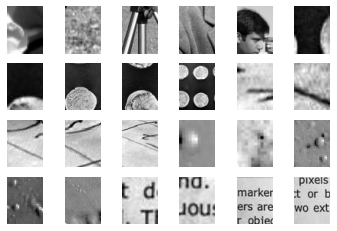

In [7]:
# Visualize Negative Set

fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[600 * i], cmap='gray')
    axi.axis('off')

### Task: Extract HOG Features

* Extract the hog features from the created image patches. Scikit-Image's feature module offers a function `skimage.feature.hog` which extracts Histogram of Oriented Gradients (HOG) features for a given image. 

* Specify a orientation, cell size, block size that you deem correct. Note you might was to comeback to this after testing different settings. Visualize should be `false`


In [8]:
# combine positive and negative sets and extract hog features

from skimage import feature   # To use skimage.feature.hog()
from itertools import chain

# We combine the positive and negative set and compute the HOG features.

X_train = np.array([hog(im)
                  for im in chain(positive_patches,
                                   negative_patches)])

y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1


## Training a classifier

Now we have created a dataset om face/non-face HoG features. Next, we aim to train a classifier using the HoG features.

### Task: Implement model from scikit-learn

Scikit-learn is a general-purpose machine-learning library for Python. It contains a large number of algorithms and utilities for machine learning and is extremely useful when you just need something that works.

* Find a model in `sklearn` and train it the the (X_train,Y_train) datapairs. *Hint:* A good place to start would be `LogisticRegression` [follow link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for documentation :
* Explore one other model found on `sklearn` and compare results.


In [9]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# implement model from scikit-learn

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train);

## Testing on unknown images

Now that we have built the Model we can test it on a new image to see how it detects the faces.

(120, 100)


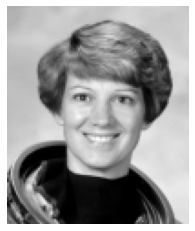

In [10]:
# Detect Faces in a New Image
test_img = data.astronaut()
test_img = rgb2gray(test_img)
test_img = transform.rescale(test_img, 0.5)
test_img = test_img[:120, 60:160]


plt.imshow(test_img, cmap='gray')
plt.axis('off');
print(test_img.shape)

## Task: sliding window
* Implement a method `sliding_windows` that take the test image and calculates hog features for different small patches / windows of the test image. Note that the patches should be the same size as the images which the classifier was trained on.

* The function should iteratively slide over the entire image to sub images, that then is classified as face or not a face. 

* The function should return a tuple of the coordinates of the upper left corner of each subimage patch, and the patch itself. 

In [11]:
# Sliding Window function - Goes Over the image patch by patch
# and computes the HOG features for each patch.


def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=, jstep=):
    indicies = []
    patches = []
    # write you code iterating (## EASIEST is to use a foor loop for each image dimension) over the test image here.
    ### EASIEST is to use a foor loop for each image dimension)
    return indicies, patches


### Task: Calculate HOG for each test patch

* Calculate HOG features of all patches of the test image. 
* There should be a corresponding array (or tuple) called `indicies`, which contain the position (upper left corner) of each patch. 

In [12]:
# Apply sliding window function to test_img


# uncommment below when the sliding window function is working.
# indices, patches = sliding_window(test_img) 
# patches_hog = np.array([feature.hog(patch,visualize=False) for patch in patches])
# patches_hog.shape



(551, 768)

In [13]:
# Use the model to evaluate if HOG patches of the image
# contains a face
labels = model.predict(patches_hog)
labels.sum() # number of face detections from all the patches in the image

52.0

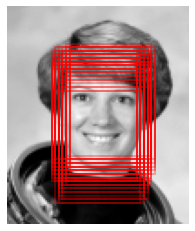

In [14]:
# Visualize the detections

fig, ax = plt.subplots()
ax.imshow(test_img, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))



### Reflections

* Explain the overall process of face recognition done in this exercise. 

* In the test image there is a great deal of overlapping boxes of the same detected faces. How would you make sure unique faces are only detected once? 
* How could the face detection framework be improved upon? 